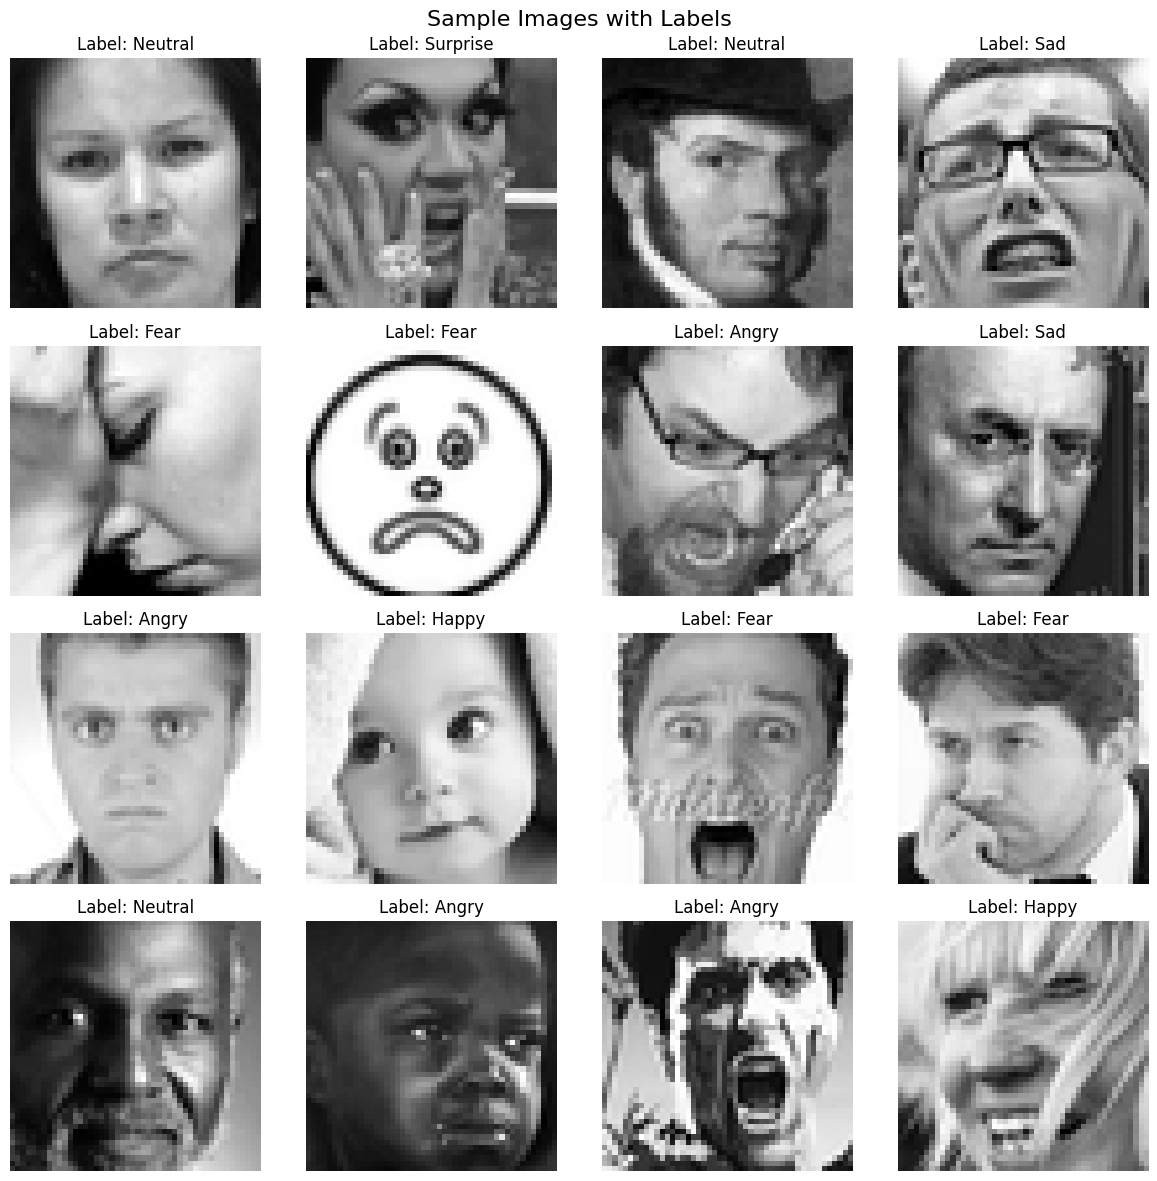

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display 16 random images with their labels
def show_sample_images(X, y, labels):
    # Select 16 random indices from the test set
    idxs = np.random.randint(0, len(X), 16)

    # Create a 4x4 grid for displaying images
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, idx in enumerate(idxs):
        img = X[idx]  # Get the image
        label = labels[np.argmax(y[idx])]  # Get the corresponding label

        # Display the image in the subplot
        axes[i].imshow(img.reshape(48, 48), cmap='gray')  # Reshape if necessary
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    # Title for the entire grid of images
    plt.suptitle("Sample Images with Labels", fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function to display 16 random sample images
show_sample_images(X_test, y_test, labels)


100%|██████████| 96.6M/96.6M [00:00<00:00, 213MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/deadskull7/fer2013/versions/1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 69s 166ms/step - accuracy: 0.2727 - loss: 1.7783 - val_accuracy: 0.4141 - val_loss: 1.5373
Epoch 2/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 81s 164ms/step - accuracy: 0.3912 - loss: 1.5546 - val_accuracy: 0.4451 - val_loss: 1.4490
Epoch 3/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 65s 160ms/step - accuracy: 0.4387 - loss: 1.4487 - val_accuracy: 0.4747 - val_loss: 1.3908
Epoch 4/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 66s 162ms/step - accuracy: 0.4647 - loss: 1.3925 - val_accuracy: 0.4932 - val_loss: 1.3674
Epoch 5/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 84s 169ms/step - accuracy: 0.4951 - loss: 1.3339 - val_accuracy: 0.5071 - val_loss: 1.3107
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4860 - loss: 1.3214
Model 1 (Adam) Accuracy: 48.41%
Epoch 1/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 67s 165ms/step - accuracy: 0.2599 - loss: 1.8135 - val_accuracy: 0.3943 - val_loss: 1.5787
Epoch 2/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 85s 173ms/step - accuracy: 0.3959 - loss: 1.5598 - val_accuracy: 0.4559 -

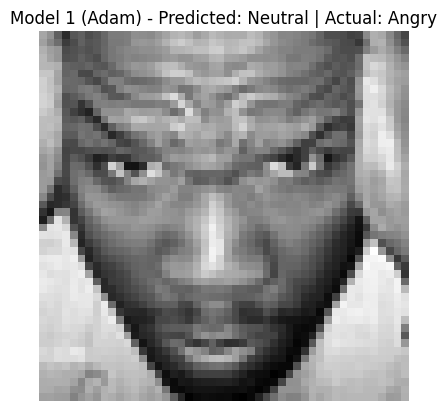

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


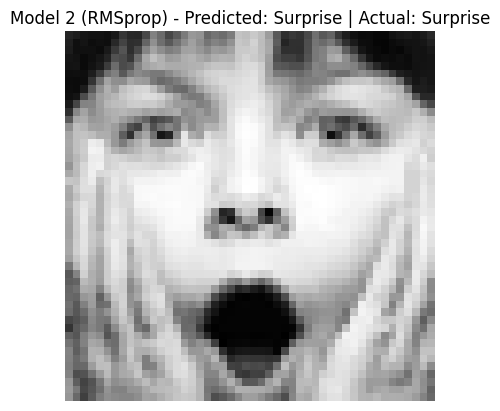

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


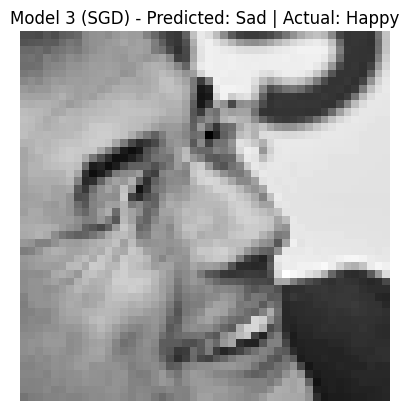

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import kagglehub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Download the dataset using kagglehub
path = kagglehub.dataset_download("deadskull7/fer2013")
print("Path to dataset files:", path)

# Load the FER2013 dataset from the downloaded path
df = pd.read_csv(f'{path}/fer2013.csv')

# Preprocess the dataset
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype='float32').reshape(48, 48) / 255.0)

# Prepare data
X = np.stack(df['pixels'].values).reshape(-1, 48, 48, 1)
y = to_categorical(df['emotion'], num_classes=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Emotion labels
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Create CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    return model

# Create and train Model 1 - Adam
model1 = create_model()
model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
loss1, acc1 = model1.evaluate(X_test, y_test)
print(f"Model 1 (Adam) Accuracy: {acc1 * 100:.2f}%")

# Create and train Model 2 - RMSprop
model2 = create_model()
model2.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
loss2, acc2 = model2.evaluate(X_test, y_test)
print(f"Model 2 (RMSprop) Accuracy: {acc2 * 100:.2f}%")

# Create and train Model 3 - SGD
model3 = create_model()
model3.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
loss3, acc3 = model3.evaluate(X_test, y_test)
print(f"Model 3 (SGD) Accuracy: {acc3 * 100:.2f}%")



# Run the prediction and display for all models
predict_and_show(model1, "Model 1 (Adam)")
predict_and_show(model2, "Model 2 (RMSprop)")
predict_and_show(model3, "Model 3 (SGD)")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


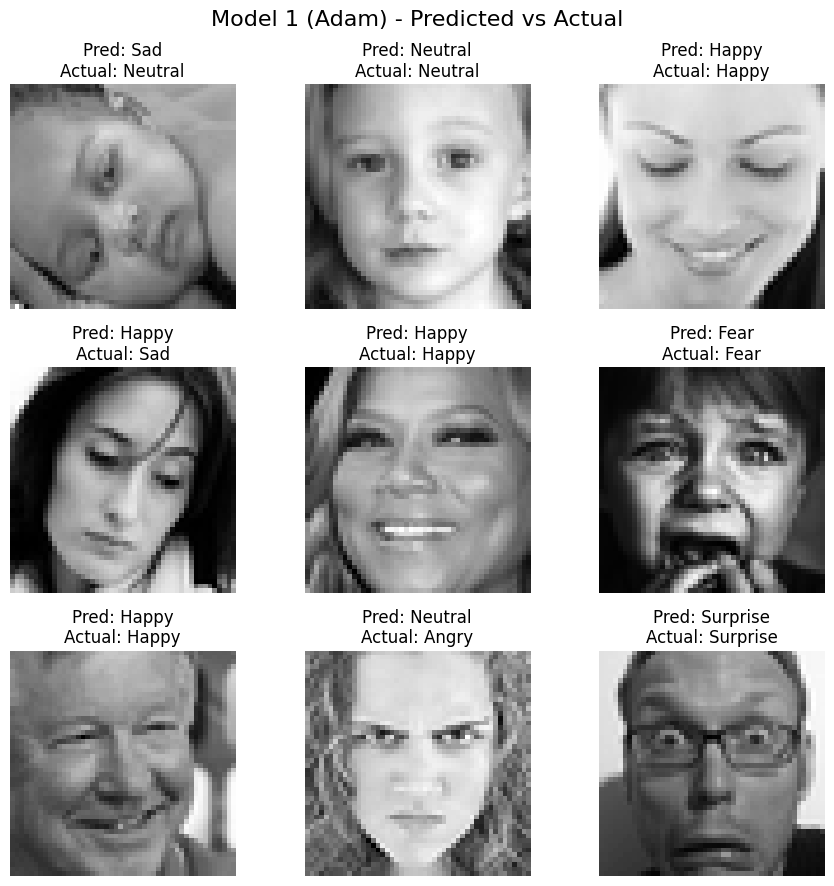

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


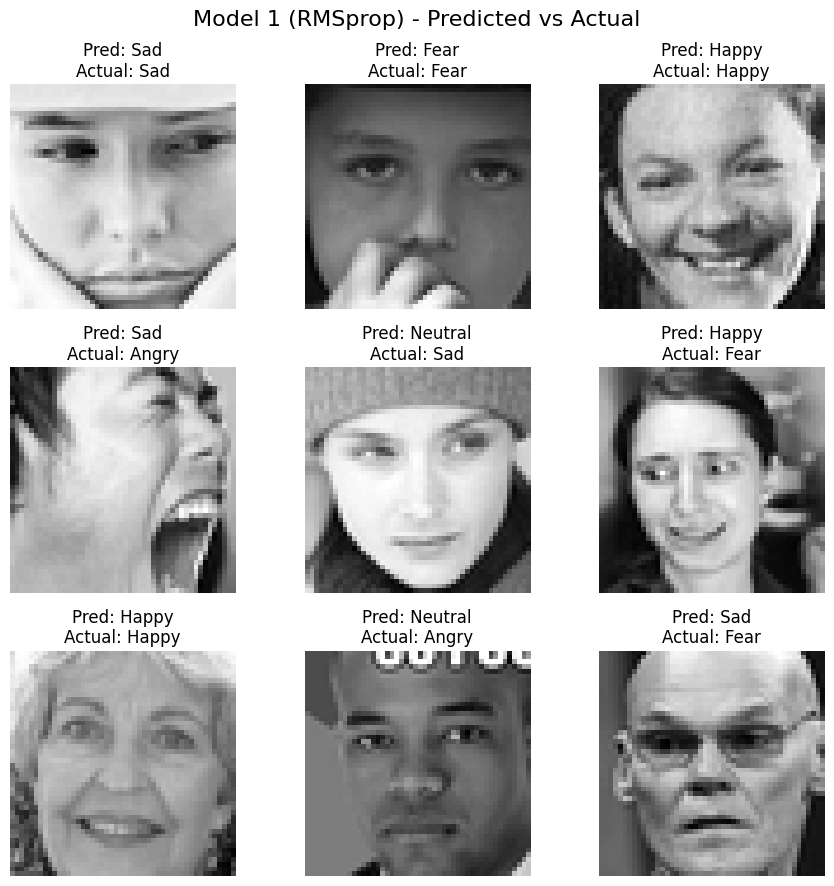

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


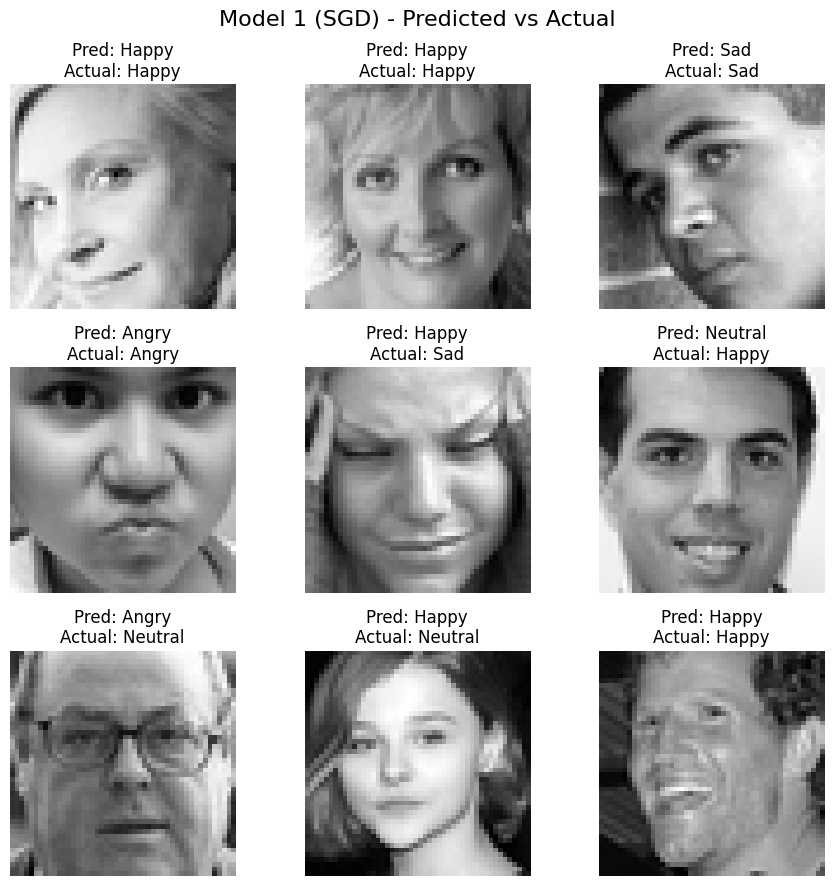

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Predict and show 9 sample images from the test set for each model
def predict_and_show(model, model_name, X_test, y_test, labels):
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))  # 3x3 grid of subplots
    axes = axes.ravel()  # Flatten the axes array for easy iteration
    idxs = np.random.randint(0, len(X_test), 9)  # Randomly select 9 images

    for i, idx in enumerate(idxs):
        img = X_test[idx]  # Get the image
        img = img.reshape(48, 48)  # Ensure the image is reshaped to 48x48 if needed
        pred = model.predict(np.expand_dims(X_test[idx], axis=0))  # Predict the label
        predicted = labels[np.argmax(pred)]  # Get the predicted label
        actual = labels[np.argmax(y_test[idx])]  # Get the actual label

        # Display the image in the subplot
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Pred: {predicted}\nActual: {actual}")
        axes[i].axis('off')

    plt.suptitle(f"{model_name} - Predicted vs Actual", fontsize=16)
    plt.tight_layout()
    plt.show()

# Example call to the function
predict_and_show(model1, "Model 1 (Adam)", X_test, y_test, labels)
predict_and_show(model2, "Model 1 (RMSprop)", X_test, y_test, labels)
predict_and_show(model3, "Model 1 (SGD)", X_test, y_test, labels)


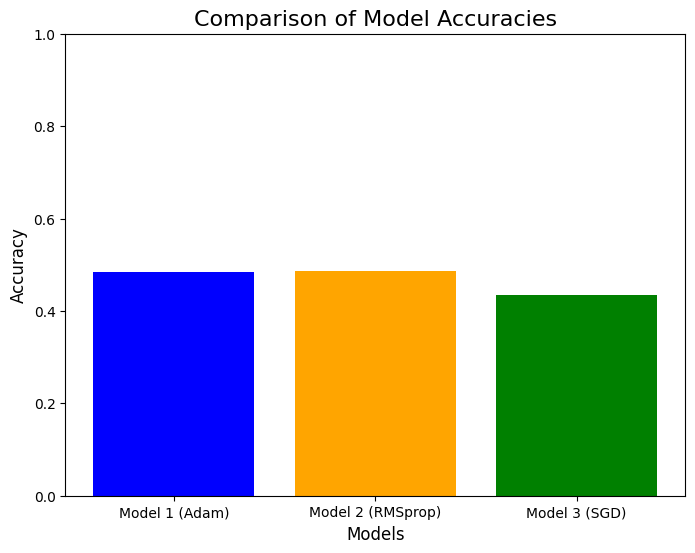

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot histogram of accuracies for different models
def plot_accuracy_histogram(model1, model2, model3, X_test, y_test):
    # Evaluate each model on the test set
    accuracy_model1 = model1.evaluate(X_test, y_test, verbose=0)[1]  # Accuracy is the second return value
    accuracy_model2 = model2.evaluate(X_test, y_test, verbose=0)[1]
    accuracy_model3 = model3.evaluate(X_test, y_test, verbose=0)[1]

    # Create a list of model names and their corresponding accuracies
    models = ['Model 1 (Adam)', 'Model 2 (RMSprop)', 'Model 3 (SGD)']
    accuracies = [accuracy_model1, accuracy_model2, accuracy_model3]

    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
    plt.title('Comparison of Model Accuracies', fontsize=16)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
    plt.show()

# Example call to the function (replace model1, model2, model3, X_test, y_test with actual variables)
plot_accuracy_histogram(model1, model2, model3, X_test, y_test)
